In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [7]:
url = 'https://raw.githubusercontent.com/digipodium/Datasets/main/regression/Position_Salaries.csv'
df = pd.read_csv(url)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [9]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [10]:
y = df['Salary'].values  # numpy arrray
X = df[['Level']].values # numpy array

score 66.90412331929895


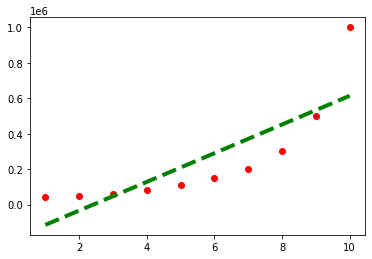

In [17]:
reg1 = LinearRegression()
reg1.fit(X,y)
ypred = reg1.predict(X)
print('score',reg1.score(X,y) * 100)
plt.scatter(X,y,c='red')
plt.plot(X, ypred, 'g--', linewidth=4)
plt.show()

In [34]:
# creating object of PF
pf = PolynomialFeatures(3)

In [35]:
# fitting PF on X
pf.fit(X)

PolynomialFeatures(degree=3)

In [37]:
# generate updated X values from PF
xopt = pf.transform(X)
xopt

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [38]:
# create and fit linear regression model
reg = LinearRegression()
reg.fit(xopt, y)

LinearRegression()

In [40]:
# score
reg.score(xopt, y) * 100

98.12097727913365

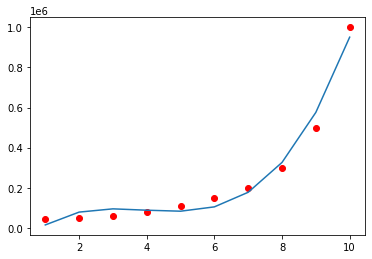

In [43]:
ypred = reg.predict(xopt)
plt.scatter(X, y, c='red')
plt.plot(X, ypred)
plt.show()

In [47]:
data = pf.transform([[15],[2.5]])
reg.predict(data)

array([5570275.1,   91272.3])

In [49]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [62]:
def get_polynomial_result(X, y, degree = 2):
    pf = PolynomialFeatures(degree)
    pf.fit(X)
    xopt = pf.transform(X)
    reg = LinearRegression()
    reg.fit(xopt, y)
    score = reg.score(xopt, y) * 100
    ypred = reg.predict(xopt)
    plt.scatter(X, y, c='red')
    plt.plot(X, ypred)
    plt.text(2, 800000, f'score:{score:.2f}')
    plt.show()

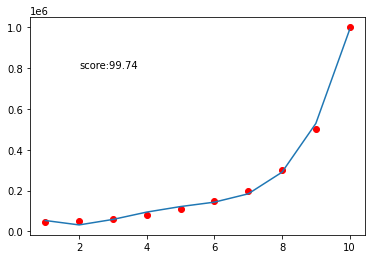

In [63]:
get_polynomial_result(X,y,4)

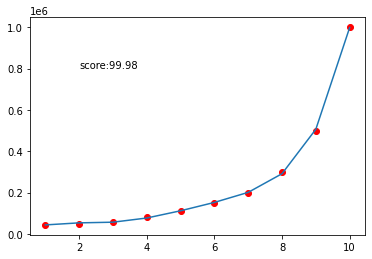

In [64]:
get_polynomial_result(X,y,5)

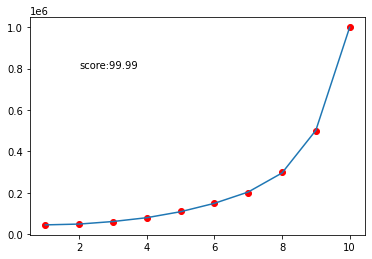

In [65]:
get_polynomial_result(X,y,6)